# HACEMOS LA CARGA DE LIBRERIAS E IMPORTACION DE LOS DATOS

In [1]:
#IMPORTACION DE LAS LIBRERIAS A USAR
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
#importamos sqlite para exportar el data frame ya tratado
import sqlite3
#importamos skitlearn para trabajar con machine learning
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [2]:
# 1. Carga del data set
df = pd.read_csv(r"C:\Users\jes-z\OneDrive\Escritorio\Proyectos\Proyecto NYC Property Sales\data\raw\nyc-rolling-sales.csv", sep = ',')

In [3]:
# 2. Estructura y composiscion del DataFrame
print ("===== Estructura del DataFrame =====")
print(df.info())

===== Estructura del DataFrame =====
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTI

# LIMPIEZA DE DATOS

In [4]:
# LIMPIEZA DE LOS DATOS
#1. Eliminamos la columna Innecesaria Unnamed 0, EASY-MENT 
df.drop(columns=['Unnamed: 0', 'EASE-MENT'], inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [5]:
# 2. Convertir columnas numéricas que vinieron como 'object'
# Usamos errors='coerce' para que lo que no sea número se convierta en NaN (nulo)
numeric_cols = ['SALE PRICE', 'LAND SQUARE FEET', 'GROSS SQUARE FEET']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# 3. Convertir la fecha
df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

# 4. Mapeo de Borough (Visión de Negocio)
# Según la documentación: 1=Manhattan, 2=Bronx, 3=Brooklyn, 4=Queens, 5=Staten Island
borough_map = {1: 'Manhattan', 2: 'Bronx', 3: 'Brooklyn', 4: 'Queens', 5: 'Staten Island'}
df['BOROUGH'] = df['BOROUGH'].map(borough_map)

# 5. Revisamos cuántos nulos resultaron tras la conversión
print("Nulos por columna después de la conversión:")
print(df[numeric_cols].isnull().sum())

Nulos por columna después de la conversión:
SALE PRICE           14561
LAND SQUARE FEET     26252
GROSS SQUARE FEET    27612
dtype: int64


In [6]:
df.info()
df.head(10)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  object        
 1   NEIGHBORHOOD                    84548 non-null  object        
 2   BUILDING CLASS CATEGORY         84548 non-null  object        
 3   TAX CLASS AT PRESENT            84548 non-null  object        
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  object        
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17
5,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,405,16,C4,516 EAST 12TH STREET,,10009,20,0,20,2581.0,9730.0,1900,2,C4,NaN,2017-07-20
6,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,406,32,C4,210 AVENUE B,,10009,8,0,8,1750.0,4226.0,1920,2,C4,3192840.0,2016-09-23
7,Manhattan,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,407,18,C7,520 EAST 14TH STREET,,10009,44,2,46,5163.0,21007.0,1900,2,C7,NaN,2017-07-20
8,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,379,34,D5,141 AVENUE D,,10009,15,0,15,1534.0,9198.0,1920,2,D5,NaN,2017-06-20
9,Manhattan,ALPHABET CITY,08 RENTALS - ELEVATOR APARTMENTS,2,387,153,D9,629 EAST 5TH STREET,,10009,24,0,24,4489.0,18523.0,1920,2,D9,16232000.0,2016-11-07


In [7]:
#LIMPIEZA DE OUTLIERS Y VALORES NULOS
# 1. Eliminamos filas donde SALE PRICE es nulo (NaN)
df = df.dropna(subset=['SALE PRICE'])

# 2. Filtramos solo ventas que representen transacciones reales de mercado
# Elegimos un umbral de $10,000 para eliminar regalos, transferencias y errores
df = df[df['SALE PRICE'] > 10000]

# 3. Veamos cuántos datos nos quedan
print(f"Registros después de filtrar precios: {len(df)}")

# Revisamos cuántos nulos resultaron tras eliminar los nulos de SALE PRICE
print("Nulos por columna después de la conversión:")
print(df[numeric_cols].isnull().sum())

# 4. Revisamos los metros cuadrados (SQUARE FEET)
# Tenemos muchos nulos ahí. Si queremos calcular 'Precio por metro cuadrado' en el futuro, también deberíamos considerar qué hacer con esos nulos.

Registros después de filtrar precios: 58400
Nulos por columna después de la conversión:
SALE PRICE               0
LAND SQUARE FEET     20995
GROSS SQUARE FEET    21513
dtype: int64


In [8]:
# Vamos a rellenar nulos de metros cuadrados con la mediana de su barrio
df['LAND SQUARE FEET'] = df.groupby('BOROUGH')['LAND SQUARE FEET'].transform(lambda x: x.fillna(x.median()))
df['GROSS SQUARE FEET'] = df.groupby('BOROUGH')['GROSS SQUARE FEET'].transform(lambda x: x.fillna(x.median()))

# Verificamos si aún quedan nulos
print(df[['LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']].isnull().sum())

LAND SQUARE FEET     0
GROSS SQUARE FEET    0
SALE PRICE           0
dtype: int64


# EXPLORACION DE DATOS EDA

In [9]:
# hacemos una verificacion ceros logicos
print("Registros con 0 en Gross Square Feet:", (df['GROSS SQUARE FEET'] == 0).sum())

Registros con 0 en Gross Square Feet: 8493


In [10]:
# Crear la columna de precio por pie cuadrado
# Usamos un filtro para evitar división por cero si aún quedaran algunos
df = df[df['GROSS SQUARE FEET'] > 0]
df['price_per_sqft'] = df['SALE PRICE'] / df['GROSS SQUARE FEET']

print("KPI 'Price per SqFt' fue creado exitosamente.")

KPI 'Price per SqFt' fue creado exitosamente.


In [11]:
# Verificamos cual es el barrio (BOROUGH) mas caro en Nueva York
# Agrupar por Barrio y calcular estadísticas clave
stats_by_borough = df.groupby('BOROUGH').agg({
    'SALE PRICE': ['mean', 'median', 'count'],
    'price_per_sqft': 'mean'
}).reset_index()

# Renombrar columnas para que sean legibles
stats_by_borough.columns = ['Borough', 'Precio_Promedio', 'Precio_Mediana', 'Num_Ventas', 'Precio_m2_Promedio']

# Ordenar por el más caro
print(stats_by_borough.sort_values(by='Precio_Mediana', ascending=False))

         Borough  Precio_Promedio  Precio_Mediana  Num_Ventas  \
2      Manhattan     3.375109e+06       1171868.5       14280   
1       Brooklyn     1.567834e+06        880000.0        8339   
3         Queens     7.559155e+05        500000.0       18050   
0          Bronx     1.056852e+06        490000.0        3396   
4  Staten Island     5.591714e+05        470000.0        5842   

   Precio_m2_Promedio  
2          329.424153  
1          491.318877  
3          367.739615  
0          248.637583  
4          338.188228  


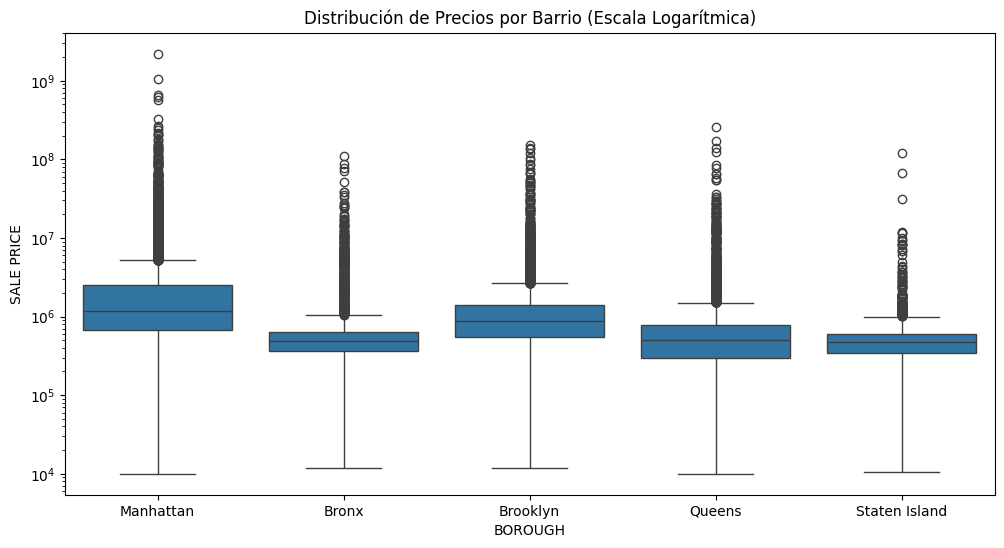

In [12]:
# Hacemos una visualización rapida en diagrama de cajas
plt.figure(figsize=(12,6))
sns.boxplot(x='BOROUGH', y='SALE PRICE', data=df)
plt.yscale('log') # Usamos escala logarítmica porque los precios varían mucho
plt.title('Distribución de Precios por Barrio (Escala Logarítmica)')
plt.show()

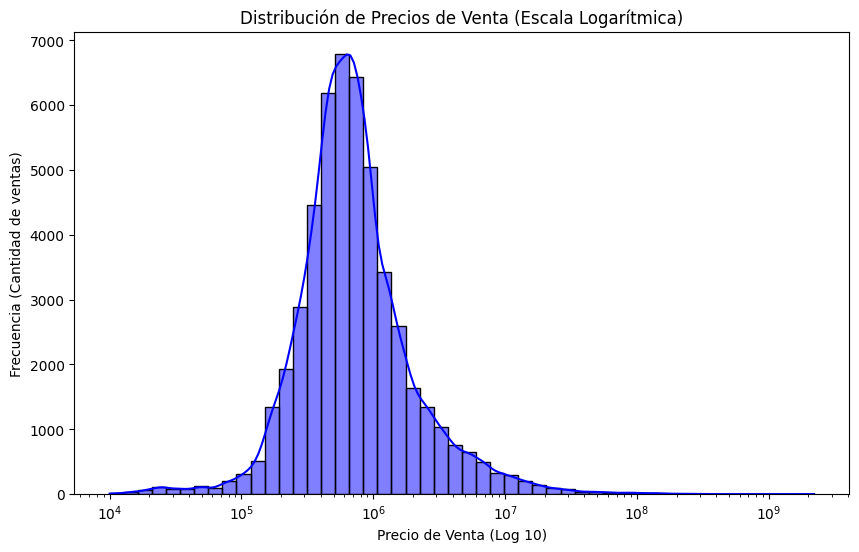

In [13]:
# Histograma de Distribucion de Frecuencia
plt.figure(figsize=(10,6))
sns.histplot(df['SALE PRICE'], bins=50, kde=True, color='blue', log_scale=True)
#plt.xscale('log')
plt.title('Distribución de Precios de Venta (Escala Logarítmica)')
plt.xlabel('Precio de Venta (Log 10)')
plt.ylabel('Frecuencia (Cantidad de ventas)')
plt.show()

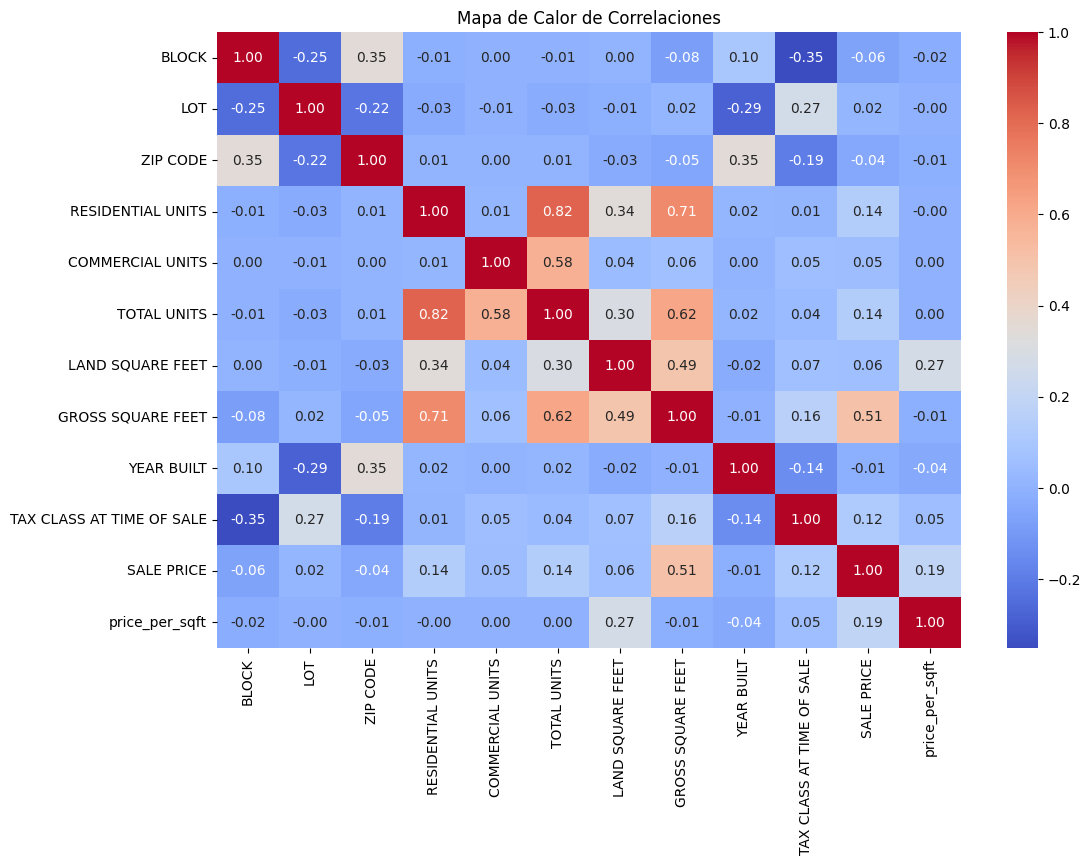

In [14]:
# MAPA DE CALOR de CORRELACIONES
plt.figure(figsize=(12,8))
# Seleccionamos solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=[np.number])
correlation = numeric_df.corr()

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

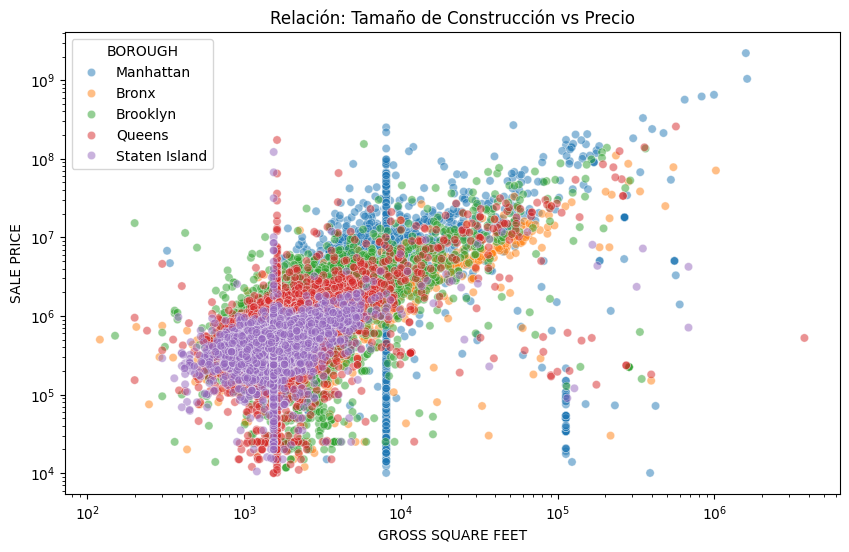

In [15]:
# GRÄFICO DE DISPERSION
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='GROSS SQUARE FEET', y='SALE PRICE', hue='BOROUGH', alpha=0.5)
plt.xscale('log')
plt.yscale('log')
plt.title('Relación: Tamaño de Construcción vs Precio')
plt.show()

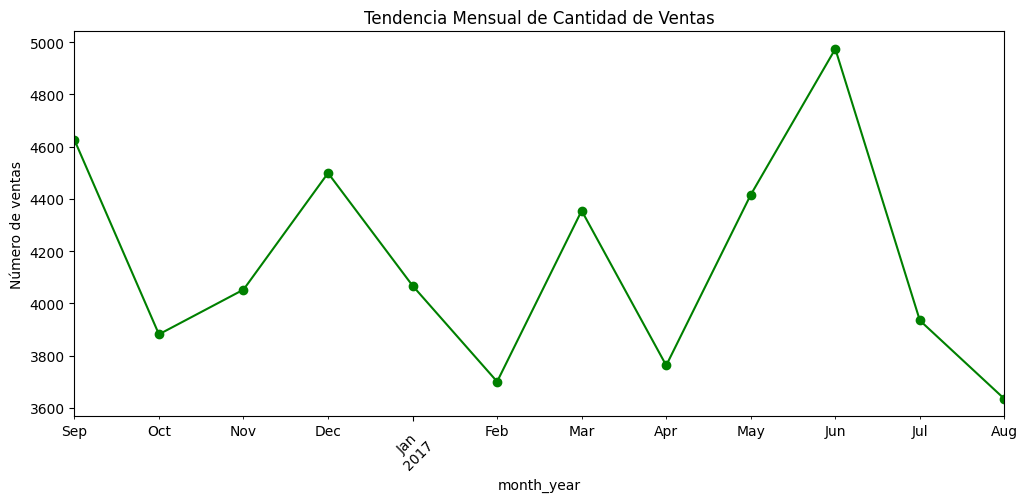

In [16]:
# SERIES DE TIEMPO (TENDENCIA DE VENTAS)
# Agrupar por mes
df['month_year'] = df['SALE DATE'].dt.to_period('M')
sales_trend = df.groupby('month_year').size()

plt.figure(figsize=(12,5))
sales_trend.plot(kind='line', marker='o', color='green')
plt.title('Tendencia Mensual de Cantidad de Ventas')
plt.xticks(rotation=45)
plt.ylabel('Número de ventas')
plt.show()

# EXPORTAMOS LOS DATOS

In [17]:
# 1. Convertir la columna 'month_year' a texto
if 'month_year' in df.columns:
    df['month_year'] = df['month_year'].astype(str)

# 2. Limpieza final de nombres de columnas (SQL prefiere guiones bajos)
# Esto cambia "SALE PRICE" a "SALE_PRICE" y "GROSS SQUARE FEET" a "GROSS_SQUARE_FEET"
df.columns = [c.replace(' ', '_').replace('-', '_') for c in df.columns]

# 3. Intentar la exportación de nuevo
import sqlite3

try:
    conn = sqlite3.connect('NYC_Real_Estate_Production.db')
    df.to_sql('cleaned_sales', conn, if_exists='replace', index=False)
    conn.close()
    print("✅ ¡Éxito! La base de datos se ha creado correctamente.")
except Exception as e:
    print(f"❌ Volvió a fallar por: {e}")

✅ ¡Éxito! La base de datos se ha creado correctamente.


In [18]:
import sqlite3

# 1. Crear la conexión a la base de datos
# Si el archivo no existe, Python lo creará automáticamente en tu carpeta actual.
conn = sqlite3.connect('NYC_Real_Estate_Production.db')

# 2. Exportar el DataFrame a una tabla llamada 'cleaned_sales'
# index=False evita que se cree una columna extra con los números de fila de Pandas
# if_exists='replace' permite que si vuelves a correr el código, la tabla se actualice
df.to_sql('cleaned_sales', conn, if_exists='replace', index=False)

# 3. (Opcional) Verificar que la tabla se creó correctamente
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
print("Tablas en la base de datos:", cursor.fetchall())

# 4. Es fundamental cerrar la conexión para que el archivo se guarde bien
conn.close()

print("\n✅ ¡Éxito! El archivo 'NYC_Real_Estate_Production.db' ha sido creado.")

Tablas en la base de datos: [('ml_predictions_results',), ('cleaned_sales',)]

✅ ¡Éxito! El archivo 'NYC_Real_Estate_Production.db' ha sido creado.


# APLICAMOS MACHINE LEARNING

In [19]:
# 1. Cargar datos desde nuestra base de datos SQL
conn = sqlite3.connect('NYC_Real_Estate_Production.db')
df = pd.read_sql("SELECT * FROM cleaned_sales", conn)

# 2. Selección de variables (Features y Target)
# Elegimos variables clave para el precio
features = ['BOROUGH', 'BUILDING_CLASS_CATEGORY', 'GROSS_SQUARE_FEET', 'YEAR_BUILT']
X = df[features]
y = df['SALE_PRICE']

# 3. Preprocesamiento: Convertir texto a números (Dummy Variables)
# Esto es necesario porque el algoritmo solo entiende de matemáticas
X = pd.get_dummies(X, columns=['BOROUGH', 'BUILDING_CLASS_CATEGORY'], drop_first=True)

# 4. Dividir los datos: 80% para entrenar, 20% para probar (Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Entrenar el modelo
print("⏳ Entrenando el modelo (esto puede tardar unos segundos)...")
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# 6. Realizar predicciones sobre el set de prueba
predictions = model.predict(X_test)

# 7. Evaluación (Visión de Administrador)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"\n📊 RESULTADOS DEL MODELO:")
print(f"Error Medio Absoluto (MAE): ${mae:,.2f}") 
print(f"Precisión (R² Score): {r2:.2f}")

# 8. GUARDAR PREDICCIONES EN SQL PARA POWER BI
# Vamos a crear una tabla final que compare Real vs Predicho
results = X_test.copy()
results['REAL_PRICE'] = y_test
results['PREDICTED_PRICE'] = predictions
results['GAP_PERCENTAGE'] = ((results['PREDICTED_PRICE'] - results['REAL_PRICE']) / results['REAL_PRICE']) * 100

results.to_sql('ml_predictions_results', conn, if_exists='replace', index=False)
conn.close()

print("\n✅ Predicciones guardadas en la tabla 'ml_predictions_results' de tu base de datos.")

⏳ Entrenando el modelo (esto puede tardar unos segundos)...

📊 RESULTADOS DEL MODELO:
Error Medio Absoluto (MAE): $903,019.44
Precisión (R² Score): 0.74

✅ Predicciones guardadas en la tabla 'ml_predictions_results' de tu base de datos.
